In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Import the data

In [4]:
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")

In [5]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [6]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [30]:
# change the column names to lower case
train.columns=map(str.lower,train.columns)
train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


#Explore the misingness of the values

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [9]:
total_missing=train.isnull().sum().sort_values(ascending=False)
percent=train.isnull().sum().sort_values(ascending=False)/train.isnull().count().sort_values(ascending=False)
missing_df=pd.concat([total_missing,percent],axis=1,keys=['total_missing','percentage_missing'],sort=False)
missing_df.index.name='variable'# set the index name to variable
missing_df=missing_df[total_missing>0] # only retain those with missing values
missing_df['percentage_missing']=missing_df['percentage_missing'].map(lambda x:x*100) # convert to percentage
missing_df

,total_missing,percentage_missing
variable,,
poolqc,1453,99.520548
miscfeature,1406,96.301370
alley,1369,93.767123
fence,1179,80.753425
masvnrtype,872,59.726027
fireplacequ,690,47.260274
lotfrontage,259,17.739726
garageyrblt,81,5.547945
garagecond,81,5.547945


#Insights
Here we get to see the total number of missing values and their percentages so as to know on what to do with them either do away with them or imput.

#Exploring the categorical values

In [10]:
categorical=train.select_dtypes(include=[object])
categorical.head(2)

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#Exploring the numerical values

In [11]:
numerical=train.select_dtypes(include=[np.number])
numerical.columns

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea',
       'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')

#Handling the missingness in the categorical values

In [12]:
categorical.fillna('None').head()

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


Below i try to handle the missingness of the numerical values and the ctegorical values separately. For the categorical values we use 'none' while for the numerical values we use 'mean' for specific columns.

In [14]:
for var in ['lotfrontage','garageyrblt','masvnrarea']:
    train[var]=train[var].fillna(train[var].mode()[0])

In [13]:
for var in ['alley','miscfeature','poolqc','fence','fireplacequ','garagecond','garagequal',
            'garagefinish','garagetype','bsmtfintype2','bsmtfintype1','bsmtqual','bsmtcond','bsmtexposure','masvnrtype','electrical']:
    train[var]=train[var].fillna('None')

In [15]:
train.isnull().sum().sort_values(ascending=False)

id             0
centralair     0
garageyrblt    0
garagetype     0
fireplacequ    0
              ..
masvnrarea     0
masvnrtype     0
exterior2nd    0
exterior1st    0
saleprice      0
Length: 81, dtype: int64

#Explore the distribution of the data

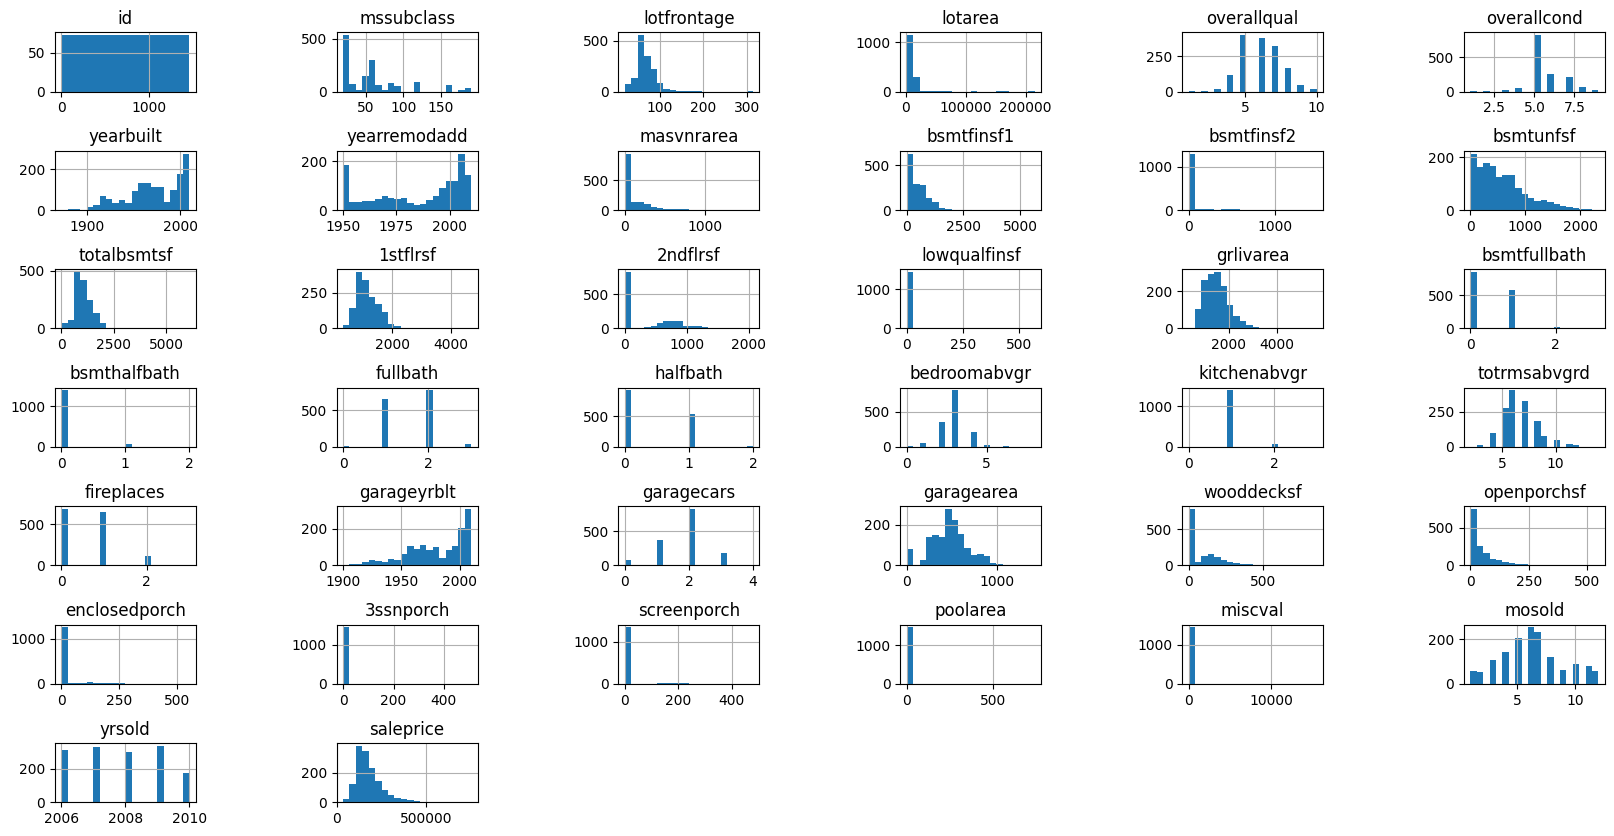

In [16]:
train.hist(figsize=(20,10),bins=20)
plt.subplots_adjust(hspace=1.0,wspace=1.0)

From the above histogram its clear that we have normal, and uniform distribution while others have a big range therefore showing signs of outliers.

#Handling outliers

In [17]:
temporal_vars=[x for x in train.columns if 'yr' in x or  'year' in x]
temporal_vars

['yearbuilt', 'yearremodadd', 'garageyrblt', 'yrsold']

In [18]:
discrete=[x for x in numerical.columns if len(train[x].unique())<25] # get all the discrete variables in the dataset
continous_numerical=[x for x in numerical.columns if x not in temporal_vars+["id"] and x not in discrete]
print("there are {} continous variables in this dataset".format(len(continous_numerical)))

there are 16 continous variables in this dataset


In [19]:
train[continous_numerical].head()

,lotfrontage,lotarea,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,grlivarea,garagearea,wooddecksf,openporchsf,enclosedporch,screenporch,saleprice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


I used boxplots for this.

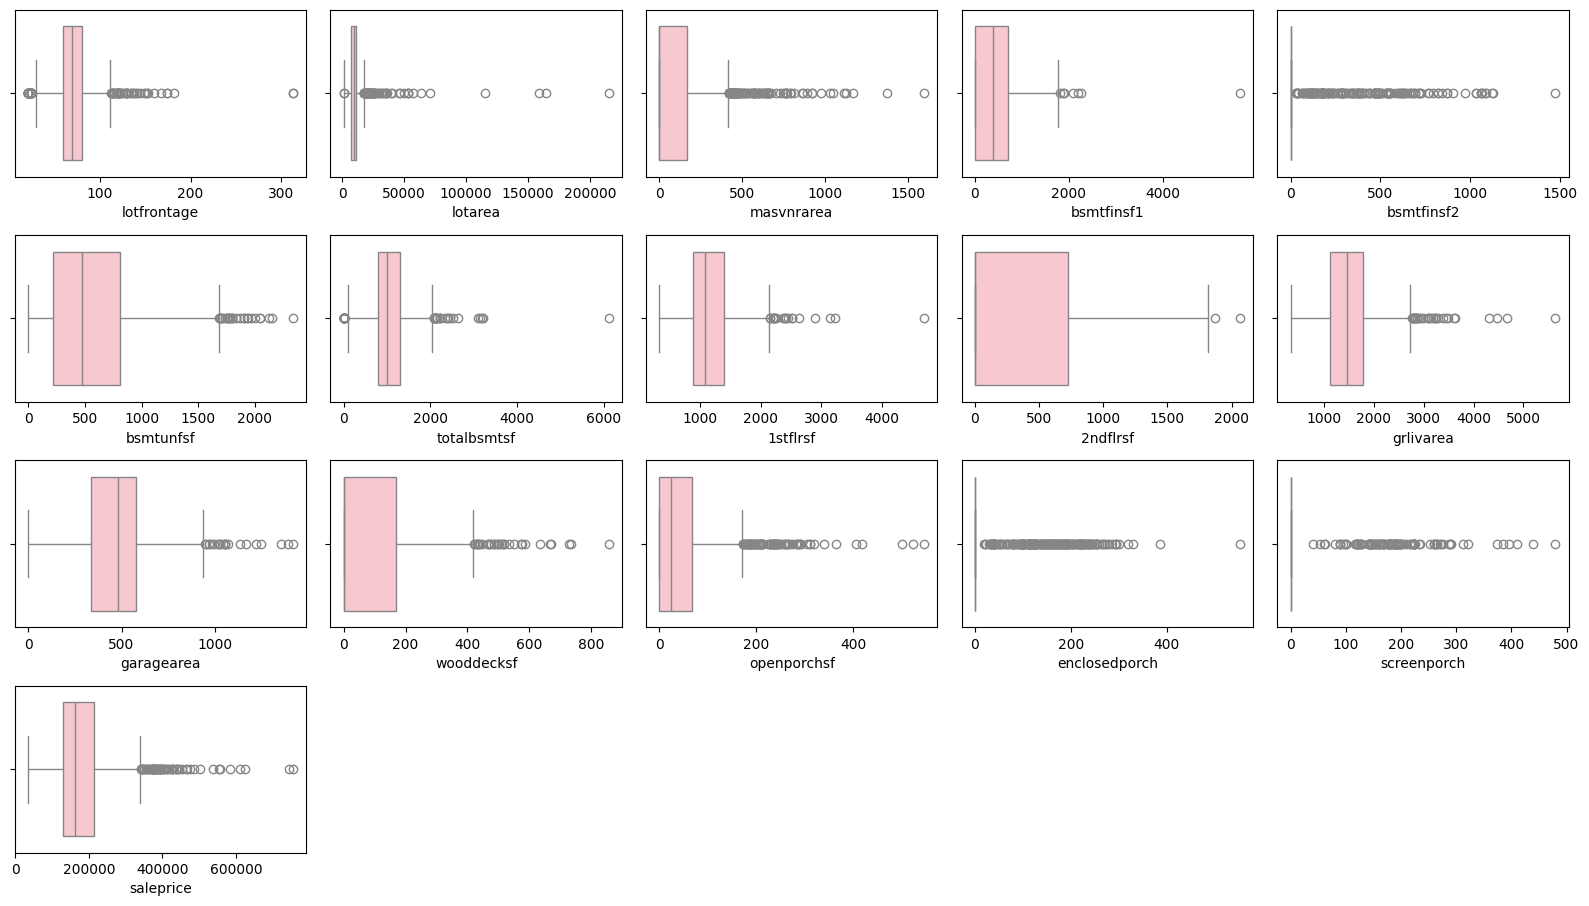

In [20]:

continous_df=numerical[continous_numerical]# get the contious variables data frame

fig=plt.figure(figsize=(16,20))
for var in range(len(continous_df.columns)):
    fig.add_subplot(9,5,var+1)
    sns.boxplot(x=continous_df.iloc[:,var],color="pink")
plt.tight_layout()
plt.show()

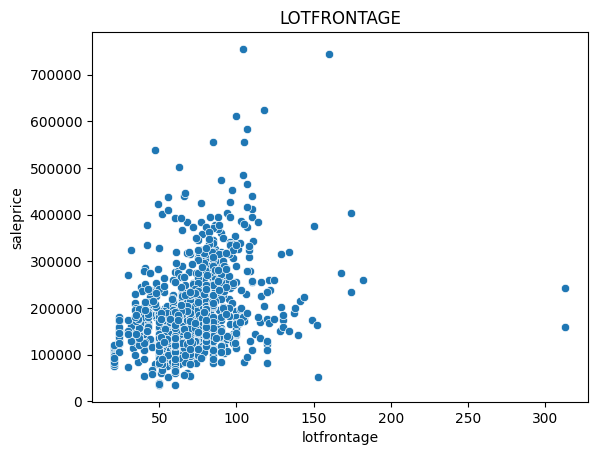

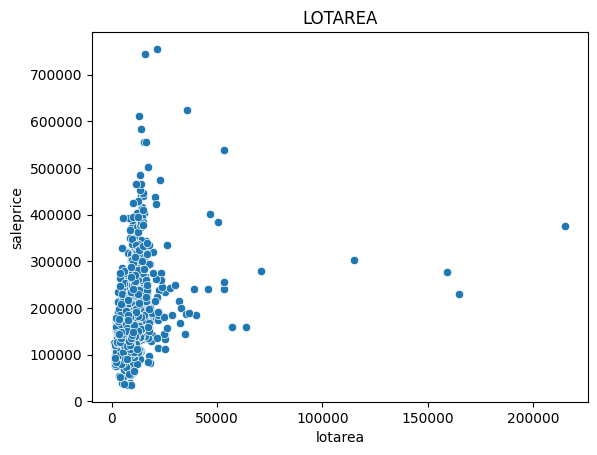

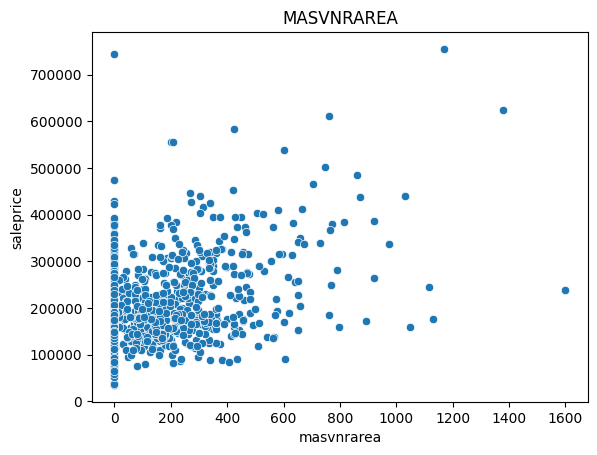

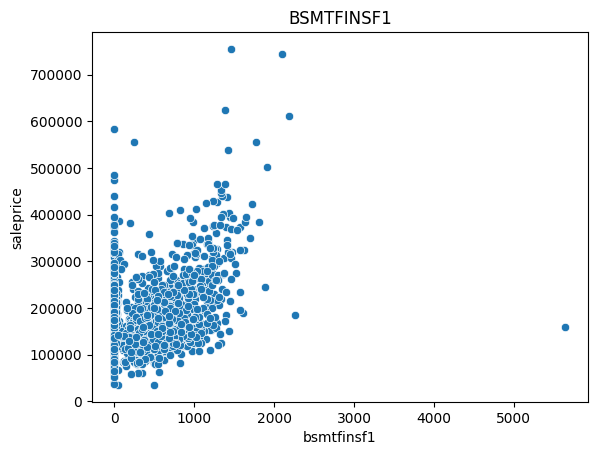

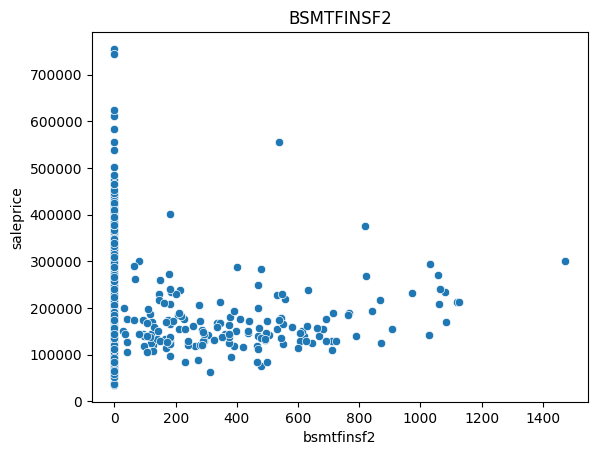

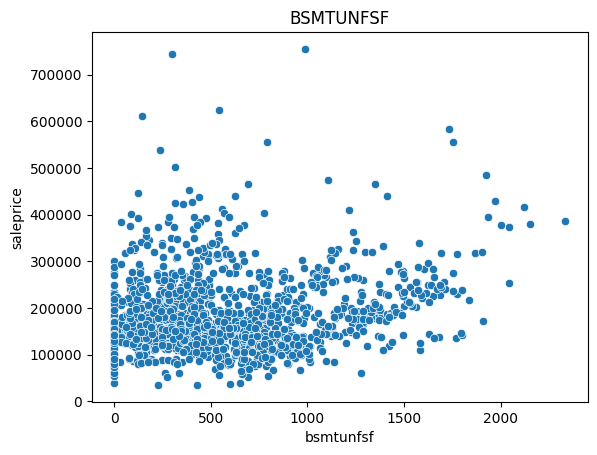

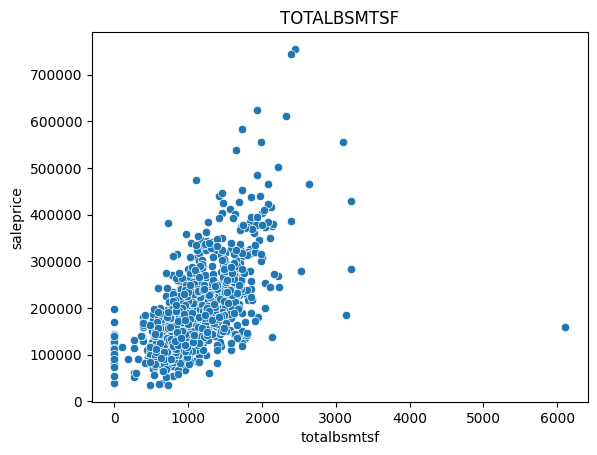

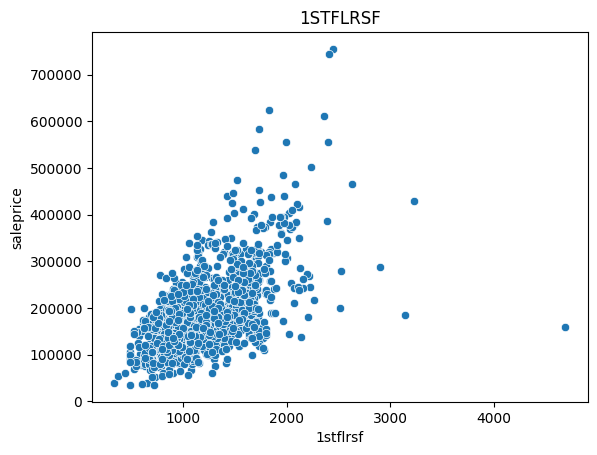

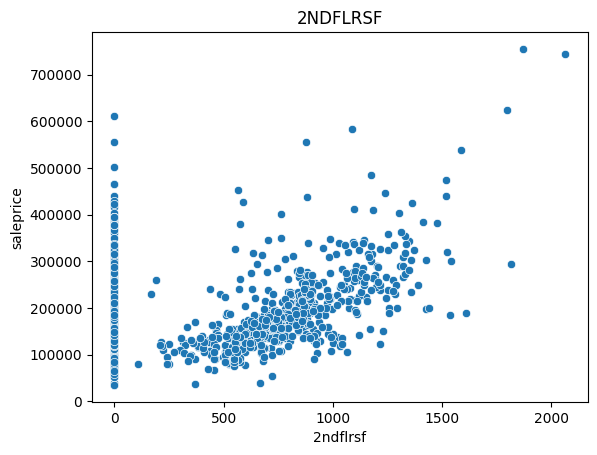

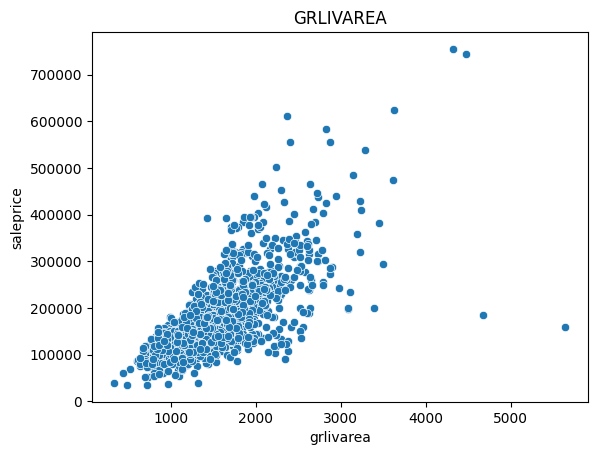

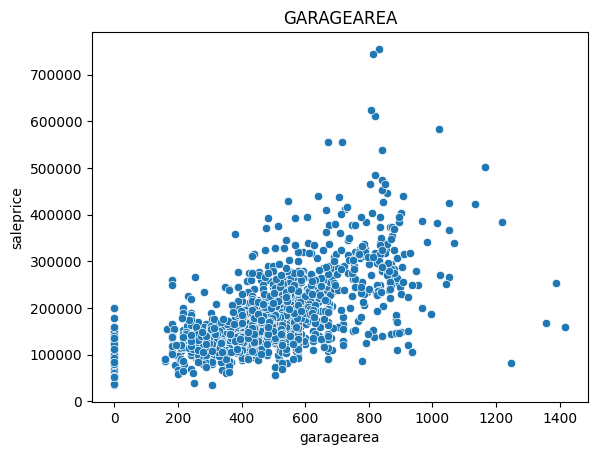

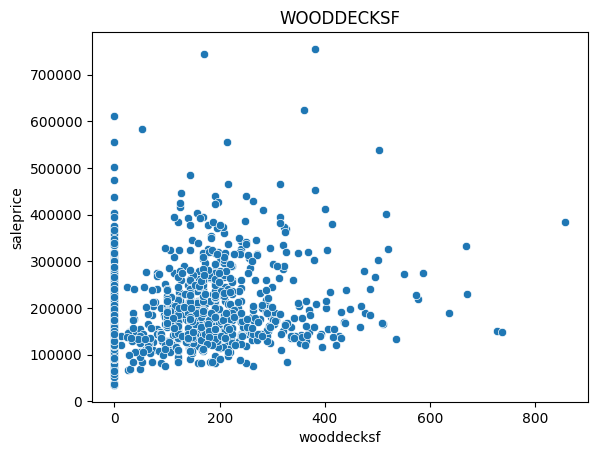

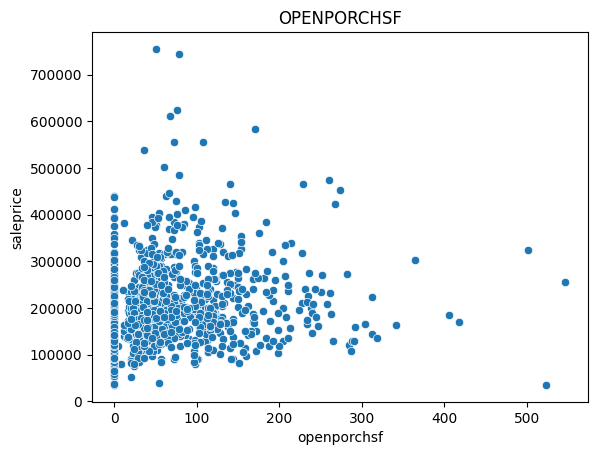

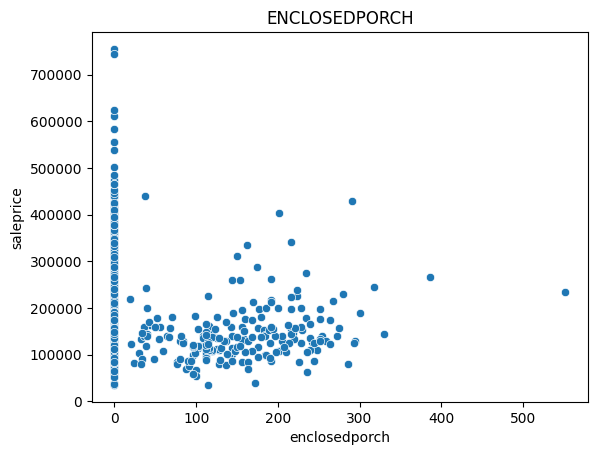

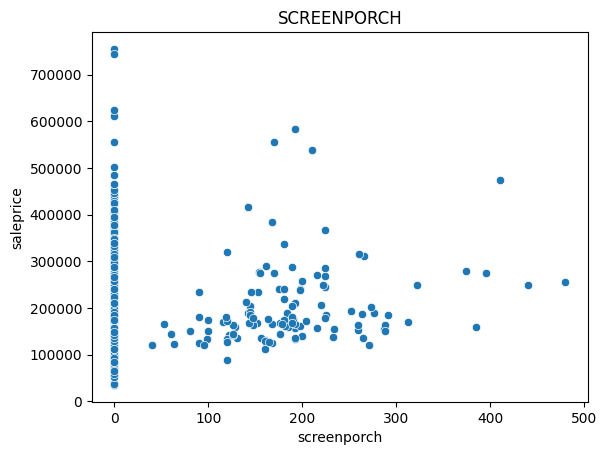

In [21]:
## bivaraite outlier analysis
for var in continous_df:
    if not var=='id'and var!='saleprice':
        sns.scatterplot(x=continous_df[var],y=continous_df['saleprice'])
        plt.title(var.upper())
        plt.show()

In [22]:
# Libraries for Feature Processing
from sklearn.preprocessing import StandardScaler, Normalizer,RobustScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Libraries for modelling
from sklearn.model_selection import  cross_val_score

from sklearn.pipeline import make_pipeline

# Other utilities
import warnings
warnings.filterwarnings(action='ignore')

## Opted for robust scaler as it remains resilient against outliers within the data by employing the median and interquartile range for the scaling process.

In [24]:
scaler = RobustScaler()
X = scaler.fit_transform(continous_df.drop(['saleprice'],axis=1))
X = pd.DataFrame(X,columns=continous_df.drop(['saleprice'],axis=1).columns)
X.head()

,lotfrontage,lotarea,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,grlivarea,garagearea,wooddecksf,openporchsf,enclosedporch,screenporch
0,-0.190476,-0.254076,1.180723,0.452790,0.0,-0.559829,-0.269652,-0.453608,1.173077,0.380070,0.281573,0.000000,0.529412,0.0,0.0
1,0.523810,0.030015,0.000000,0.834679,0.0,-0.330769,0.538308,0.343643,0.000000,-0.312090,-0.082816,1.773810,-0.367647,0.0,0.0
2,-0.047619,0.437624,0.975904,0.143910,0.0,-0.074359,-0.142289,-0.327933,1.189560,0.497489,0.530021,0.000000,0.250000,0.0,0.0
3,-0.428571,0.017663,0.000000,-0.235170,0.0,0.106838,-0.468657,-0.247423,1.038462,0.390885,0.670807,0.000000,0.147059,272.0,0.0
4,0.714286,1.181201,2.108434,0.381186,0.0,0.021368,0.305473,0.113893,1.446429,1.134029,1.474120,1.142857,0.867647,0.0,0.0


###Split the data

In [28]:
y =continous_df.saleprice
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=48,test_size=.3)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)


(1022, 15) (1022,) (438, 15) (438,)


#Linear regression

In [32]:
from sklearn import linear_model
reg=linear_model.LinearRegression()


In [42]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform the test data
X_train_imputed = imputer.fit_transform(x_train)
X_test_imputed = imputer.transform(x_test)


In [ ]:
reg.fit(X_train_imputed, y_train)


In [48]:
y_pred=reg.predict(X_test_imputed)
print(y_pred)

[161612.31337206 156169.37704183 184571.76772861 208472.13827295
 139518.02656165 173825.21650627 182410.04682343 180215.56439458
 116533.20938193 206005.93082235 209733.38199923 104683.78676275
 167492.63113353 125086.77485388 199851.12362214  80669.6922891
 132005.97109528 322032.73145464 166054.36166231 278916.3563693
  93574.23987728 219523.82376603 197272.82100566 181708.27555266
  82952.6343336   76032.66000166 117629.28723469 122910.25454107
 300809.21856943 181361.91075072 214021.81608672 244024.60716102
 197739.86908228 175102.62991187 113543.14754757 312177.95234641
 178498.30577221 148065.67350282 333251.16945269 261244.86443824
 130304.87438891 112620.54253573  60801.02195723 173526.15501046
 141147.22171691 122823.78651058 219508.23094333  95931.11700104
 179788.26988443 196752.84886792 263485.52343295 274383.45280737
 268836.30132929 108522.30850637 107490.49346974 419711.31571877
 233401.82474369 201551.58557879 151384.32900341 185029.94542741
 174580.53683229 154086.568

In [47]:
print(y_test)

1236    175500
1071    154000
559     234000
55      180500
513     134000
         ...  
472     148000
1009    102000
701     140000
261     276000
851     215000
Name: saleprice, Length: 438, dtype: int64


In [49]:
print(np.mean((y_pred-y_test)**2))

2874156569.91578
